<h1>🧽 Data Cleaning - Dataset B (0001-1085) 🧽</h1>

Perform data cleaning on a segment in Dataset B.

<h2>🗃 Import Libraries</h2>

In [1]:
#pip install geopandas matplotlib folium shapely

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import webbrowser

<h2>📤 Upload Dataset</h2>

In [3]:
B_Original_df = pd.read_csv("datasets\input\Dataset_B.csv")

<h2>🔍 Inspect Dataset</h2>

<h3>Check Data Types</h3>

In [4]:
B_Original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1864 entries, 0 to 1863
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Business Model  1864 non-null   object 
 1   Category        1864 non-null   object 
 2   Subcategory     10 non-null     object 
 3   Company Name    1864 non-null   object 
 4   Address         1864 non-null   object 
 5   Latitude        1779 non-null   float64
 6   Longitude       1779 non-null   float64
 7   State           1862 non-null   object 
 8   Country         1864 non-null   object 
 9   Contact No.     1785 non-null   object 
 10  Fax No.         307 non-null    object 
 11  Website         437 non-null    object 
 12  Email           321 non-null    object 
 13  Capital USD $   1426 non-null   object 
 14  Employees       725 non-null    object 
dtypes: float64(2), object(13)
memory usage: 218.6+ KB


<h3>Check For Null Values</h3>

In [5]:
B_Original_df.isnull().any()

Business Model    False
Category          False
Subcategory        True
Company Name      False
Address           False
Latitude           True
Longitude          True
State              True
Country           False
Contact No.        True
Fax No.            True
Website            True
Email              True
Capital USD $      True
Employees          True
dtype: bool

<h3>Summarize Dataset</h3>

In [6]:
B_Original_df.describe()

,Latitude,Longitude
count,1779.000000,1779.000000
mean,42.365284,24.675297
std,4.553125,8.840733
min,-37.737455,-99.462582
25%,42.097707,23.620812
50%,42.634591,24.745500
75%,43.014080,25.625748
max,53.148688,150.630222


<h3>Check Random Samples</h3>

In [7]:
B_Original_df.sample(5)

,Business Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Capital USD $,Employees
901,OEM,Woodworking Machinery,NaN,KOLEV-2005,"19 str. BILKA str.,Plachkovtsi,Bulgaria,5360",42.828812,25.480829,Plachkovtsi,Bulgaria,359 (0)82 833127,NaN,NaN,NaN,"508,074.00",NaN
1738,OEM,Packaging,NaN,PAVLOLES,"38 YURIY GAGARIN,Slivata,Bulgaria,3668",43.761760,23.042560,Slivata,Bulgaria,359 (0)88 8719902,NaN,NaN,NaN,"1,486,000.00",NaN
1654,OEM,Weighing Machines,NaN,ELOPAR,"45 Evropa blvd.,Yambol,Bulgaria,8600",42.490479,26.495035,Yambol,Bulgaria,359 (0)88 6405563,NaN,NaN,NaN,"2,641,100.00",NaN
65,OEM,"Tools, Cutters, Moulds, and Dies",NaN,TECHNOPANEL,"49? Balgaria blvd. - Triaditsa Distr., Entr. A...",42.666843,23.290023,Sofia,Bulgaria,359 (0)88 4115332,359 (0)2 9942423,http://www.technopanel.com,office@technopanel.com,NaN,NaN
625,OEM,Agricultural Machinery,NaN,TRAKTOR,"1 GRIVISHKO SHOSE,Pleven,Bulgaria,5800",43.414884,24.656209,Pleven,Bulgaria,359 (0)64 838206,NaN,NaN,NaN,"1,656,339.56",59


<h2>🧼 Clean Dataset</h2>

<h3>✂️ Remove Irrelevant Data</h3>

<h4>Confirm Shape</h4>

In [8]:
B_Original_df.shape

(1864, 15)

<h4>Peek Dataframe</h4>

In [9]:
B_Original_df.head(3)

,Business Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Capital USD $,Employees
0,OEM,Metal Cutting Tools,NaN,MACHINE COMMERCE LTD,"11 Kozanovska str.,Asenovgrad,Bulgaria,4230",42.016030,24.877286,Asenovgrad,Bulgaria,359 (0)88 6399355,359 (0)331 63030,NaN,NaN,"3,109,200.00",NaN
1,OEM,Metal Cutting Tools,NaN,ZMM - SLIVEN,"16 Bansko Shose str.,Sliven,Bulgaria,8800",42.639093,26.303853,Sliven,Bulgaria,359 (0)44 622891,359 (0)44 662563,http://www.zmmsliven.com,office@zmmbulgaria.com,"15,227,800.00",NaN
2,OEM,Metal Cutting Tools,NaN,UNITECH-TROYAN,"229 str. GENERAL KARTSOV,Troyan,Bulgaria,5600",42.869076,24.711611,Troyan,Bulgaria,359 (0)88 5329733,NaN,NaN,NaN,"534,693.00",NaN


In [10]:
B_Original_df.tail(3)

,Business Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Capital USD $,Employees
1861,Distributor,Industrial Automation,NXP Semiconductors,Future,"23 Andrej Saharov Street, Sofia, Bulgaria",42.654166,23.371124,Sofia,Bulgaria,359-2-974-5952,NaN,https://www.futureelectronics.com/,NaN,NaN,NaN
1862,Distributor,Industrial Automation,NXP Semiconductors,Mouser Electronics,AZ Tower Pražákova 1008/69 639 00 Brno,49.176166,16.605594,NaN,Bulgaria,420-517070880,NaN,https://www.mouser.bg/manufacturer/nxp-semicon...,bulgaria@mouser.com,NaN,NaN
1863,Distributor,Drives,Schaeffler,Bultech EOOD,Rokfeler 69 2850 Petrich Bulgaria,41.398143,23.206045,Petrich,Bulgaria,NaN,NaN,https://bultech-bg.com/,bultechpe@gmail.com,NaN,NaN


In [15]:
K_Incorrect_df

,Status,Business Model,Category,Valid Category/Business Model,Subcategory,Company,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Annual Sales,Annual Sales (Range),Employees
51,Incorrect,OEM,Casting,Invalid,"Alloy Aluminium Die Costing Products, Air Poll...",KOREA ENVIRONMENTAL INDUSTRY & TECHNOLOGY INST...,"215,Jinheung-ro, Eunpyeong-guSeoul 03367South ...",37.610183,126.933201,Seoul,South Korea,NaN,+82 23800599,https://keiti.re.kr/en/index.do,NaN,"474,417,504.00","$100,000,000 and above",571.0
52,Incorrect,OEM,Special Machine Tools,Invalid,"Steel Strapping Companies, Canned Fruit Making...","Dongwon F And B Co., Ltd.","68 Mabang-ro Seocho-gu Seoul, Korea",37.477780,127.044042,Seoul,South Korea,NaN,NaN,https://dw.co.kr/default.htm,NaN,"3,009,636,300.00","$100,000,000 and above",1700.0
90,Incorrect,OEM,Machinery for Processing Plastics,Invalid,Laminators,"DONGJIN SEMICHEM CO., LTD.","644, Baekbeom-ro, Seo-gu, Incheon 22824South K...",37.478971,126.685034,Incheon,South Korea,NaN,+82 23259459,https://dongjin.com,NaN,"1,107,483,400.00","$100,000,000 and above",4999.0
105,Incorrect,End-User,Leather,Invalid,"Tanning, Dressing, or Dyeing of Leather & Fur","A Ko Co., Ltd.","126 Gamaeul-Gil, Gonjiam-Up 012723 Gwangju Sou...",37.355834,127.387048,Gyeonggi-do,South Korea,+82 31 548 2992,NaN,NaN,NaN,"6,100,000.00","$1,000,000 to $9,999,999",11.0
122,Incorrect,OEM,Paper Making & Converting Machinery,Invalid,"Highest Consistency Cleaners, Highest Consiste...",OCI COMPANY LTD.,"94, Sogong-ro, Jung-guSeoul 04532South Korea",37.563313,126.980458,Seoul,South Korea,NaN,+82 27779097,https://oci.co.kr,NaN,"3,503,487,000.00","$100,000,000 and above",1667.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6535,Incorrect,OEM,Household Machinery,Invalid,"home appliances, water purifer","Enstar Co., Ltd.","1148-3, Sooweolam 3-ri, Seotan-myeon, Pyeongta...",37.102208,127.021456,Gyeonggi-do,South Korea,NaN,NaN,NaN,NaN,"4,148,000.00","$1,000,000 to $9,999,999",9.0
6563,Incorrect,OEM,Shoe Making Machinery,Invalid,Cutting Machine Plastic Sheet,"INCHEON EPS CO.,LTD.","50, Anyogol-gil, Hyangnam-eup, Hwaseong-siGyeo...",37.107125,126.963562,Gyeonggi-do,South Korea,NaN,+82 31 359 9015,https://iceps.co.kr,NaN,"15,479,112.00","$10,000,000 to $19,999,999",44.0
6569,Incorrect,OEM,Machinery Equipment for Foundry Plant,Invalid,Die Casting Machines,Cor-Tek MIC Corporation,"203, Sang-dongGyeonggi-do, South Korea",37.297282,127.639615,Gyeonggi-do,South Korea,NaN,NaN,NaN,NaN,"11,142,000.00","$10,000,000 to $19,999,999",16.0
6576,Incorrect,OEM,Household Machinery,Invalid,Household Juice-extractors,Best Green Corp.,"Rm 4-201 103 Seodun-dong, Kwonsun-guGyeonggi-d...",37.267378,126.986431,Gyeonggi-do,South Korea,NaN,+82 31 293 3887,NaN,NaN,"3,715,075.00","$1,000,000 to $9,999,999",6.0


<h4>Rename Column From 'Capital USD $' To 'Annual Sales'</h4>

In [14]:
B_Original_df.rename(columns={'Capital USD $': 'Annual Sales'}, inplace=True)

In [15]:
B_Original_df.sample(5)

,Business Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Annual Sales,Employees
1460,OEM,Hardware Metal Products and Products of Other ...,NaN,A.D.HOLD,"4 Devnya str. - Odesos Distr.,Varna,Bulgaria,9000",43.206051,27.890805,Varna,Bulgaria,359 (0)52 631946,NaN,NaN,NaN,"7,540,669.92",89
1615,OEM,Services,NaN,CHIKO,"19 Ul. Georgi Kyoseivanov str.,Peshtera,Bulgar...",42.032814,24.301878,Peshtera,Bulgaria,359 (0)350 65719,NaN,https://www.bebemarket.bg/en-gb/chicco-en-gb,info@bebemarket.bg,"340,838.00",16
408,OEM,Packaging,NaN,OFSET,"20 Ravnishte - Ovcha Kupel Distr.,Sofia,Bulgar...",NaN,NaN,Sofia,Bulgaria,359 (0)89 9838260,NaN,NaN,NaN,NaN,NaN
1248,OEM,Electric Machinery,NaN,ELNA,"5 Ul. Sinchets str.,Gabrovo,Bulgaria,5300",42.881825,25.317926,Gabrovo,Bulgaria,359 (0)66 803503,NaN,NaN,NaN,NaN,NaN
984,OEM,Woodworking Machinery,NaN,ELBA - 99,"3 str. DR HRISTO MOMCHILOV,Elena,Bulgaria,5070",42.929890,25.877378,Elena,Bulgaria,359 (0)6151 2122,NaN,NaN,NaN,"3,472.00",NaN


<h3>⚠️ Fix Formatting Issues</h3>

<h4>Check DType</h4>

In [22]:
B_Original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1864 entries, 0 to 1863
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Business Model  1864 non-null   object 
 1   Category        1864 non-null   object 
 2   Subcategory     10 non-null     object 
 3   Company Name    1864 non-null   object 
 4   Address         1864 non-null   object 
 5   Latitude        1779 non-null   float64
 6   Longitude       1779 non-null   float64
 7   State           1862 non-null   object 
 8   Country         1864 non-null   object 
 9   Contact No.     1785 non-null   object 
 10  Fax No.         307 non-null    object 
 11  Website         437 non-null    object 
 12  Email           321 non-null    object 
 13  Annual Sales    1426 non-null   Float64
 14  Employees       725 non-null    Int64  
dtypes: Float64(1), Int64(1), float64(2), object(11)
memory usage: 222.2+ KB


<h4>Change Annual Sales 'object' to 'float128'</h4>

In [17]:
B_Original_df['Annual Sales'] = B_Original_df['Annual Sales'].str.replace(',', '')

In [18]:
B_Original_df['Annual Sales'] = pd.to_numeric(B_Original_df['Annual Sales'], errors='coerce').astype('Float64')

<h4>Change Employees 'float64' to 'int64'</h4>

In [20]:
B_Original_df['Employees'] = B_Original_df['Employees'].str.replace(',', '')

In [21]:
B_Original_df['Employees'] = B_Original_df['Employees'].astype('Int64')

<h4>Format Contact No.</h4>

In [24]:
B_Original_df['Contact No.'] = B_Original_df['Contact No.'].str.replace('-', '').str.replace('(', '').str.replace(')', '').str.replace(' ', '')

In [31]:
B_Original_df['Contact No.']

0                     NaN
1       (+82) 6-1797-9825
2        (+82) 2-9211-766
3       (+82) 4-3219-5200
4                     NaN
              ...        
6590    (+82) 2-2659-1116
6592                  NaN
6593                  NaN
6594                  NaN
6595                  NaN
Name: Contact No., Length: 5890, dtype: object

In [26]:
B_Original_df['Contact No.'] = B_Original_df['Contact No.'].str.slice_replace(start = 0, stop = 0, repl = '(')
B_Original_df['Contact No.'] = B_Original_df['Contact No.'].str.slice_replace(start = 4, stop = 4, repl = ')')

In [28]:
B_Original_df['Contact No.'] = B_Original_df['Contact No.'].str.slice_replace(start = 5, stop = 5, repl = ' ')
B_Original_df['Contact No.'] = B_Original_df['Contact No.'].str.slice_replace(start = 7, stop = 7, repl = '-')

In [30]:
B_Original_df['Contact No.'] = B_Original_df['Contact No.'].str.slice_replace(start = 12, stop = 12, repl = '-')

<h4>Format Fax No.</h4>

In [32]:
B_Original_df['Fax No.'] = B_Original_df['Fax No.'].str.replace('-', '').str.replace('(', '').str.replace(')', '').str.replace(' ', '')

In [37]:
B_Original_df['Fax No.']

0       (+82) 4-1331-5191
1                     NaN
2                     NaN
3                     NaN
4       (+82) 3-1377-7347
              ...        
6590    (+82) 2-6096-6165
6592    (+82) 2-3443-1136
6593    (+82) 2-2145-4543
6594     (+82) 2-5820-116
6595    (+82) 4-2862-4170
Name: Fax No., Length: 5890, dtype: object

In [34]:
B_Original_df['Fax No.'] = B_Original_df['Fax No.'].str.slice_replace(start = 0, stop = 0, repl = '(')
B_Original_df['Fax No.'] = B_Original_df['Fax No.'].str.slice_replace(start = 4, stop = 4, repl = ')')

In [35]:
B_Original_df['Fax No.'] = B_Original_df['Fax No.'].str.slice_replace(start = 5, stop = 5, repl = ' ')
B_Original_df['Fax No.'] = B_Original_df['Fax No.'].str.slice_replace(start = 7, stop = 7, repl = '-')

In [36]:
B_Original_df['Fax No.'] = B_Original_df['Fax No.'].str.slice_replace(start = 12, stop = 12, repl = '-')

<h4>Format Website</h4>

In [38]:
B_Original_df['Website'] = B_Original_df['Website'].str.replace('https://', '')
B_Original_df['Website'] = B_Original_df['Website'].str.replace('http://', '')

In [39]:
B_Original_df['Website']

0       dwpolychem.com/home/eng/
1                 hyoseok.co.kr/
2                   bugunfnc.com
3                     abov.co.kr
4               altoendaewoo.com
                  ...           
6590                 61cns.co.kr
6592              haeseung.co.kr
6593                         NaN
6594               hanmaek.co.kr
6595                         NaN
Name: Website, Length: 5890, dtype: object

<h4>Finalize DType</h4>

In [41]:
B_Original_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5890 entries, 0 to 6595
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Status                         1901 non-null   object 
 1   Business Model                 5890 non-null   object 
 2   Category                       5890 non-null   object 
 3   Valid Category/Business Model  5890 non-null   object 
 4   Subcategory                    5543 non-null   object 
 5   Company                        5890 non-null   object 
 6   Address                        5890 non-null   object 
 7   Latitude                       5890 non-null   float64
 8   Longitude                      5890 non-null   float64
 9   State                          5890 non-null   object 
 10  Country                        5890 non-null   object 
 11  Contact No.                    1264 non-null   object 
 12  Fax No.                        3525 non-null   object

<h3>🎏 Remove Duplicate Records</h3>

<h4>Check Current Shape of Dataframe</h4>

In [42]:
B_Original_df.shape

(5890, 18)

<h4>Count Duplicate Rows for Validation</h4>

In [44]:
duplicate_rows = B_Original_df[B_Original_df.duplicated()]
duplicate_rows.shape[0]

0

<h4>Check New Shape of Dataframe</h4>

In [45]:
B_Original_df.shape

(5890, 18)

<h3>🌐 Validate Geolocation Data</h3>

<h4>Get Country Borders</h4>

In [46]:
geo_df = gpd.read_file("https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson")

In [47]:
country = geo_df[geo_df['name'] == 'Korea']

<h4>Convert To GeoDataFrame</h4>

In [48]:
B_Original_df_copy = B_Original_df

In [49]:
geo_df = gpd.GeoDataFrame(B_Original_df_copy, geometry = gpd.points_from_xy(
    B_Original_df_copy['Longitude'], B_Original_df_copy['Latitude']), crs="EPSG:4326")

<h4>Check Coordinates</h4>

In [50]:
points_within = gpd.sjoin(geo_df, country, how='inner', predicate='within')

In [51]:
points_outside = geo_df[~geo_df.index.isin(points_within.index)]

In [52]:
print("Points inside the country:\n")
points_within

Points inside the country:



,Status,Business Model,Category,Valid Category/Business Model,Subcategory,Company,Address,Latitude,Longitude,State,...,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,featureclass
0,Correct,OEM,Machinery for Processing Plastics,Invalid,"Glass Fiber Moulding Press, Glass Fiber Making...",DAEWOONG CO.LTD,"937-24, Hwanggeumtteul-ro, Sinam-myeon, Yesan-...",36.729137,126.777398,Chungcheongnam-do,...,Asia,Asia,Eastern Asia,East Asia & Pacific,5,17,4,-99,1,Admin-0 country
2,NaN,End-User,Textile,Invalid,Women's Apparel,"BUGUNFNC.CO.,LTD","173, Digital-ro, Geumcheon-gu, SEOUL",37.477926,126.886056,Seoul,...,Asia,Asia,Eastern Asia,East Asia & Pacific,5,17,4,-99,1,Admin-0 country
3,NaN,End-User,Electronics,Invalid,NaN,"ABOV Semiconductor Co., Ltd.","93 Gangni 1-gil, Ochang-eup, Cheongwon-gu Cheo...",36.706719,127.432323,Chungcheongbuk-do,...,Asia,Asia,Eastern Asia,East Asia & Pacific,5,17,4,-99,1,Admin-0 country
4,Correct,End-User,Appliances,Invalid,NaN,"ALTOEN DAEWOO Co., Ltd.","23-7 Dongtansandan 9-gil Hwaseong, Gyeonggi, 1...",37.175970,127.089778,Gyeonggi-do,...,Asia,Asia,Eastern Asia,East Asia & Pacific,5,17,4,-99,1,Admin-0 country
5,NaN,End-User,Textile,Invalid,NaN,3Q INTERNATIONAL LTD,"1/F 135-3 Baumoe-ro, Seocho-gu Seoul, Seoul, 6...",37.476293,127.035454,Seoul,...,Asia,Asia,Eastern Asia,East Asia & Pacific,5,17,4,-99,1,Admin-0 country
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6589,NaN,OEM,Industrial Turnkey Plant,Invalid,Velvet Making Plant,HUE COSMEDICS INC.,"1373-4, Seonyu-ri, Munsan-euGyeonggi-do, South...",37.862226,126.809451,Gyeonggi-do,...,Asia,Asia,Eastern Asia,East Asia & Pacific,5,17,4,-99,1,Admin-0 country
6590,NaN,End-User,Non-Metallic,Invalid,Glass and glass products,Ryukil C&S,"#702, Kukdong Vip Bldg Yeouido-Dong 70-Gi None...",37.518060,126.942637,Seoul,...,Asia,Asia,Eastern Asia,East Asia & Pacific,5,17,4,-99,1,Admin-0 country
6592,Correct,OEM,Transportation Equipment,Invalid,Bumper For Cars,"HAESEUNG INTERNATIONAL CO., LTD.","78-3, Samsung-dong, Gangnam-guGyeonggi-do 135-...",37.519310,127.058030,Seoul,...,Asia,Asia,Eastern Asia,East Asia & Pacific,5,17,4,-99,1,Admin-0 country
6593,NaN,OEM,Food Machinery,Invalid,Seed Sprouter,Han Mac Gbn,Suite A-1309 Galleria Palace 40 Jamsil-dong So...,37.511373,127.092957,Seoul,...,Asia,Asia,Eastern Asia,East Asia & Pacific,5,17,4,-99,1,Admin-0 country


In [53]:
print("Coordinates outside the country:")
points_outside

Coordinates outside the country:


,Status,Business Model,Category,Valid Category/Business Model,Subcategory,Company,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Annual Sales,Annual Sales (Range),Employees,geometry
1,NaN,End-User,Steel,Invalid,Other Basic Metals,"HYOSUK CO., LTD.","2148-33, Jecheol-ro, Gwangyang-si, Jeollanam-d...",34.913518,127.748018,Jeollanam-do,South Korea,(+82) 6-1797-9825,NaN,hyoseok.co.kr/,NaN,<NA>,NaN,NaN,POINT (127.74802 34.91352)
6,NaN,End-User,Electronics,Invalid,",",Ace Technologies Corp.,"16 Harmony-ro 187beon-gil, Yeonsu-gu Incheon, ...",37.379267,126.641643,Incheon,South Korea,(+82) 3-2818-5500,(+82) 3-2818-5505,acetech.co.kr,NaN,<NA>,NaN,NaN,POINT (126.64164 37.37927)
12,Correct,End-User,HVAC,Invalid,",","Arsystem Co.,Ltd","Rm 201 32 Gyeongje-ro Siheung, Gyeonggi, 15095...",37.339943,126.701940,Gyeonggi-do,South Korea,NaN,NaN,arsystem.co.kr,NaN,<NA>,NaN,NaN,POINT (126.70194 37.33994)
18,Correct,End-User,HVAC,Invalid,",","BLUENIX Co., Ltd.","17 Emtibeui 3-ro, Danwon-gu Ansan, Gyeonggi, 1...",37.294729,126.772460,Gyeonggi-do,South Korea,NaN,(+82) 3-1491-1603,bluenix.com,info@bluenix.com,<NA>,NaN,NaN,POINT (126.77246 37.29473)
20,NaN,End-User,Steel,Invalid,NaN,"A1 Special Steel Co.,Ltd.","146 Mayu-ro Siheung, Gyeonggi, 15110 Republic ...",37.330434,126.722744,Gyeonggi-do,South Korea,NaN,NaN,a1specialsteel.com/gnuboard4,NaN,<NA>,NaN,NaN,POINT (126.72274 37.33043)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6574,NaN,OEM,Forging & Stamping,Invalid,Aerospace Forging Parts,Han Jin heavy Industries Co. Ltd,"233 Taejong-ro, Bongnaedong 5(o)-ga, Yeongdo-g...",35.096496,129.050293,Busan,South Korea,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,POINT (129.05029 35.0965)
6575,NaN,OEM,Food Machinery,Invalid,Soy Beans Oil Extraction Plants,HAN JIN INDUSTRY,"437, Mangyang-ro, Yeosu-si, Jeollanam-do 05962...",34.784948,127.750082,Jeollanam-do,South Korea,NaN,(+82) 6-1651-9814,hanjin.koreasme.com,NaN,<NA>,NaN,NaN,POINT (127.75008 34.78495)
6577,Correct,End-User,Steel,Invalid,"Forging, Pressing, Stamping, or Roll-Forming o...",Hyundai Steel,1 Songhyeon-Dong Dong-Gu 401-712 Incheon South...,37.480999,126.642253,Incheon,South Korea,(+82) 3-2760-2114,NaN,hyundai-steel.com,NaN,24000000000.0,"$100,000,000 and above",11234.0,POINT (126.64225 37.481)
6581,NaN,OEM,Metal Cutting Tools,Invalid,Gear Reducer,"Han Kook Chain Motor Co., Ltd.","627,Gojan-dong ,Namdong-gu,Incheon, South Korea",37.405428,126.690827,Incheon,South Korea,NaN,(+82) 3-2815-8059,NaN,NaN,<NA>,NaN,NaN,POINT (126.69083 37.40543)


In [54]:
points_within.shape[0]

5214

In [55]:
points_outside.shape[0]

676

In [57]:
B_Original_df_copy.shape[0]

5890

<h4>Visualization</h4>

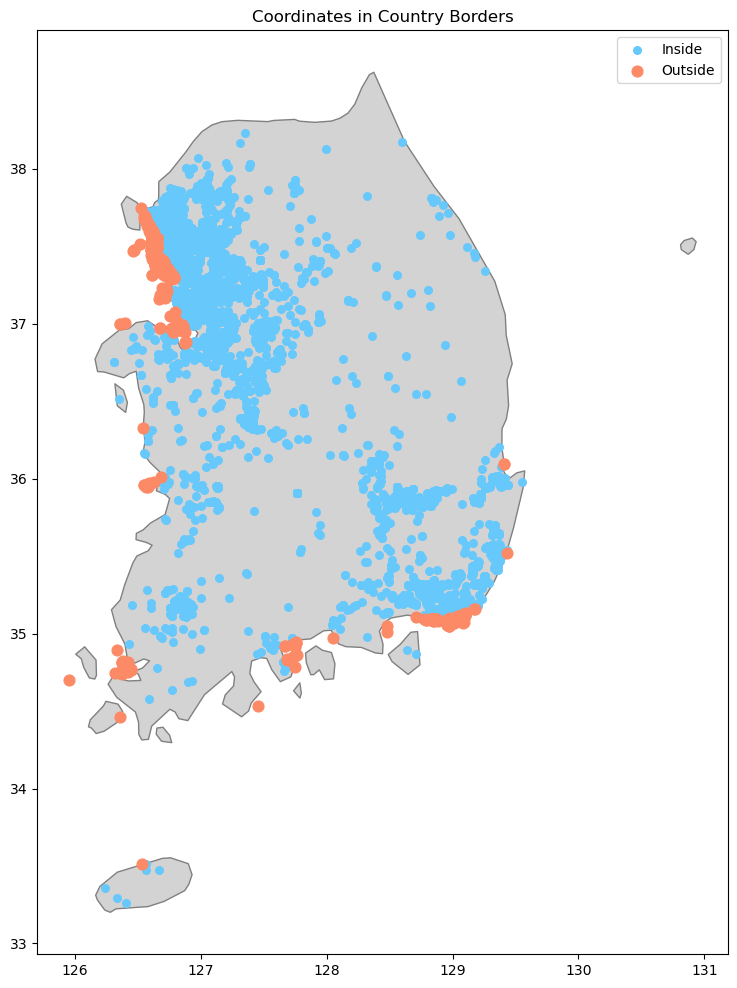

In [58]:
fig, ax = plt.subplots(figsize=(12, 12))
country.plot(ax=ax, color='lightgrey', edgecolor='grey')
points_within.plot(ax=ax, color='#67c8fc', markersize=30, label='Inside')
geo_df[~geo_df.index.isin(points_within.index)].plot(ax=ax, color='#fc8a67', markersize=60, label='Outside')

plt.title("Coordinates in Country Borders")
plt.legend()
plt.show()

<h4>Inspect Rows with Outside Coordinates</h4>

In [60]:
points_outside[['Company', 'Latitude', 'Longitude']].drop_duplicates()

,Company,Latitude,Longitude
1,"HYOSUK CO., LTD.",34.913518,127.748018
6,Ace Technologies Corp.,37.379267,126.641643
12,"Arsystem Co.,Ltd",37.339943,126.701940
18,"BLUENIX Co., Ltd.",37.294729,126.772460
20,"A1 Special Steel Co.,Ltd.",37.330434,126.722744
...,...,...,...
6574,Han Jin heavy Industries Co. Ltd,35.096496,129.050293
6575,HAN JIN INDUSTRY,34.784948,127.750082
6577,Hyundai Steel,37.480999,126.642253
6581,"Han Kook Chain Motor Co., Ltd.",37.405428,126.690827


In [61]:
country_projected = country.to_crs("EPSG:3857")
centroid = country_projected.geometry.centroid.to_crs("EPSG:4326")
center_lat, center_lon = centroid.y.mean(), centroid.x.mean()

In [64]:
m = folium.Map(location=[center_lat, center_lon], zoom_start=5)

folium.GeoJson(country).add_to(m)

for idx, row in points_outside.iterrows():
    color = 'lightblue' if idx in points_within.index else 'lightred'
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Company'],
        icon=folium.Icon(color=color)
    ).add_to(m)

m.save('map2.html')

In [65]:
webbrowser.open('map2.html',new = 2)

True

<h4>Set Status to Incorrect</h4>

In [87]:
B_Original_df.loc[points_outside.index, 'Status'] = 'Incorrect'

In [88]:
B_Original_df.loc[points_outside.index, 'Status']

1       Incorrect
6       Incorrect
12      Incorrect
18      Incorrect
20      Incorrect
          ...    
6574    Incorrect
6575    Incorrect
6577    Incorrect
6581    Incorrect
6594    Incorrect
Name: Status, Length: 676, dtype: object

<h4>Transfer Incorrect Data</h4>

In [92]:
K_Incorrect_df.shape[0]

1382

In [90]:
incorrect = B_Original_df[B_Original_df['Status'] == 'Incorrect']

In [91]:
K_Incorrect_df = pd.concat([K_Incorrect_df, incorrect], ignore_index=True)

In [95]:
B_Original_df.shape[0]

5214

In [94]:
B_Original_df = B_Original_df[~(B_Original_df['Status'] == 'Incorrect')]

<h3>📝 Correct Incorrect Entries</h3>

<h4>Resolve Busines Model</h4>

In [67]:
B_Original_df['Business Model'].unique()

array(['OEM', 'End-User', 'System Integrator', 'Distributor'],
      dtype=object)

<h4>Resolve Category</h4>

In [68]:
Categories = np.sort(B_Original_df['Category'].unique())
Categories

array(['Agricultural Machinery', 'Agriculture',
       'Apparatus & Machinery For Chemical Industry', 'Apparel',
       'Appliances', 'Automatic Machinery & Equipment', 'Automation',
       'Automotive', 'Bearing', 'Beverage', 'Boiler', 'Builder',
       'Casting', 'Chemicals', 'Construction', 'Construction Machinery',
       'Drives', 'Dryers', 'Electric Machinery', 'Electrical',
       'Electronics', 'Electronics & Electrical', 'Energy',
       'Equipment For Smelting Plant & Rolling Mills', 'Fabricated Metal',
       'Fishing, Animal & Husbandry Machinery', 'Food', 'Food Machinery',
       'Forging & Stamping', 'Freezing & Air Conditioning Equipment',
       'Furniture', 'Grinders, Crushers & Screen Machines', 'HVAC',
       'Hardware, Metal Products & Other Products Of Materials',
       'Heat Treatment Equipment', 'Household Machinery',
       'Hydraulic Presses, Pneumatic & Hydraulic Machinery', 'Hydraulics',
       'Industrial Equipment', 'Industrial Furnace',
       'Industrial

<h4>Resolve Subcategory</h4>

In [69]:
B_Original_df['Subcategory'] = B_Original_df['Subcategory'].str.title()

In [72]:
B_Original_df['Subcategory'] = B_Original_df['Subcategory'].str.replace(',','')

<h4>Resolve State</h4>

In [75]:
B_Original_df['State'].unique()

array(['Chungcheongnam-do', 'Jeollanam-do', 'Seoul', 'Chungcheongbuk-do',
       'Gyeonggi-do', 'Incheon', 'Ulsan', 'Daegu', 'Sejong',
       'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Daejeon', 'Busan',
       'Gangwon-do', 'Gwangju', 'Jeju-do', 'Jeollabuk-do'], dtype=object)

<h4>Resolve Country</h4>

In [76]:
B_Original_df['Country'].unique()

array(['South Korea'], dtype=object)

<h3>📈 Detect and Treat Outliers</h3>

In [77]:
plt.style.use('fivethirtyeight')

<h4>Check Latitude</h4>

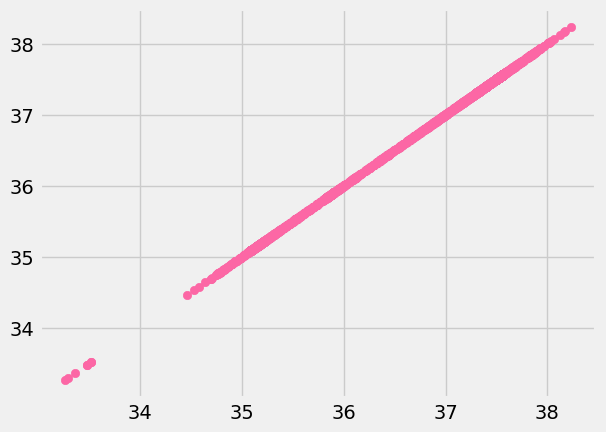

In [78]:
plt.scatter(B_Original_df['Latitude'], B_Original_df['Latitude'], color='#fc67a5')
plt.show()

<h4>Check Longitude</h4>

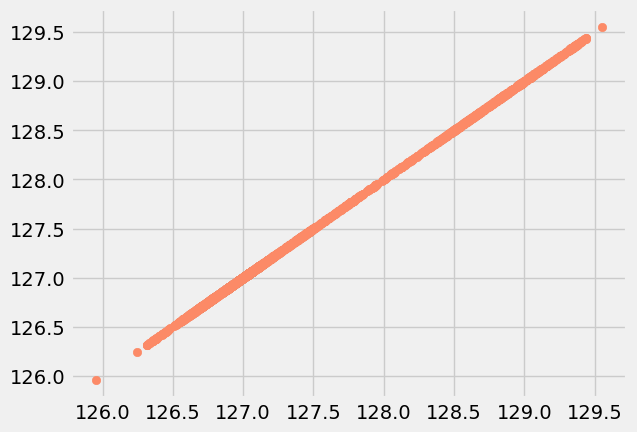

In [79]:
plt.scatter(B_Original_df['Longitude'], B_Original_df['Longitude'], color='#fc8a67')
plt.show()

<h4>Check Annual Sales</h4>

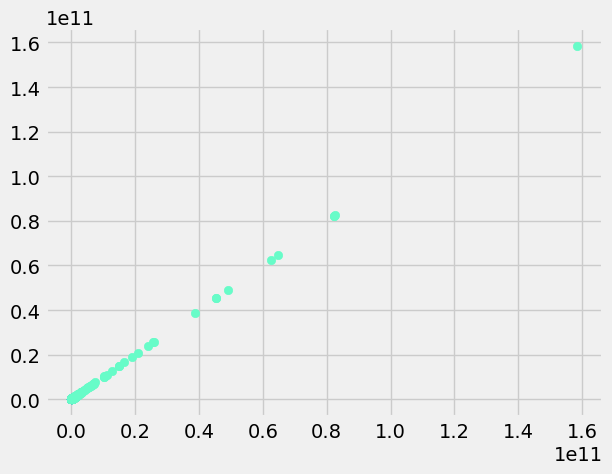

In [81]:
plt.scatter(B_Original_df['Annual Sales'], B_Original_df['Annual Sales'], color='#67fcc8')
plt.show()

<h4>Check Employees</h4>

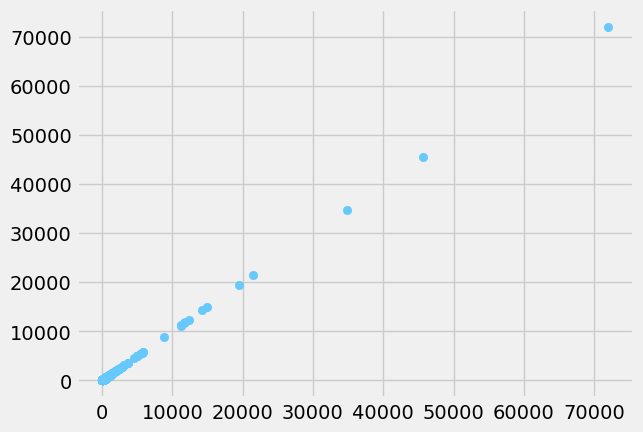

In [82]:
plt.scatter(B_Original_df['Employees'], B_Original_df['Employees'], color='#67c8fc')
plt.show()

So far, there are <b>no outliers</b> in the dataset.

<h2>🔎 Finalize Dataset</h2>

<h3>Check Data Types</h3>

In [99]:
B_Original_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5214 entries, 0 to 6595
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Status                         1677 non-null   object 
 1   Business Model                 5214 non-null   object 
 2   Category                       5214 non-null   object 
 3   Valid Category/Business Model  5214 non-null   object 
 4   Subcategory                    4908 non-null   object 
 5   Company                        5214 non-null   object 
 6   Address                        5214 non-null   object 
 7   Latitude                       5214 non-null   float64
 8   Longitude                      5214 non-null   float64
 9   State                          5214 non-null   object 
 10  Country                        5214 non-null   object 
 11  Contact No.                    1110 non-null   object 
 12  Fax No.                        3113 non-null   object

<h3>Check For Null Values</h3>

In [100]:
B_Original_df.isnull().any()

Status                            True
Business Model                   False
Category                         False
Valid Category/Business Model    False
Subcategory                       True
Company                          False
Address                          False
Latitude                         False
Longitude                        False
State                            False
Country                          False
Contact No.                       True
Fax No.                           True
Website                           True
Email                             True
Annual Sales                      True
Annual Sales (Range)              True
Employees                         True
Incorrect                         True
dtype: bool

<h3>Summarize Dataset</h3>

In [101]:
B_Original_df.describe()

,Latitude,Longitude,Annual Sales,Employees
count,5214.000000,5214.000000,1840.0,1377.0
mean,36.831264,127.442084,760808453.261413,456.944808
std,0.899603,0.797900,5931098412.397326,2770.520663
min,33.258930,126.243515,58312.0,1.0
25%,35.954991,126.906336,17708262.0,32.0
50%,37.317116,127.057657,55195600.0,81.0
75%,37.510522,127.766922,197069062.5,249.0
max,38.233460,129.553072,158476877300.0,72001.0


<h3>Check Random Samples</h3>

In [102]:
B_Original_df.sample(5)

,Status,Business Model,Category,Valid Category/Business Model,Subcategory,Company,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Annual Sales,Annual Sales (Range),Employees,Incorrect
3462,NaN,OEM,Casting,Invalid,Costing For Textile Machinery Use,"DAIRO MC CO., LTD","Rm 512 Hakun-ri 117 Hwanggeum-ro Yangchon-eup,...",37.617106,126.621029,Gyeonggi-do,South Korea,(+82) 2-8525-191,NaN,na4.dnbi.com/dnbiweb/#/dnbi/internationalEcf/f...,NaN,<NA>,NaN,<NA>,NaN
1522,Correct,End-User,Automotive,Invalid,Other Basic Metals Other Basic Metals,HANDS CORPORATION LTD.,"50, Gajeong-ro 37beon-gil, Seo-gu, INCHEON",37.488754,126.665191,Incheon,South Korea,NaN,NaN,handscorp.co.kr,NaN,582134700.0,"$100,000,000 and above",1213,NaN
3258,NaN,OEM,Metal Cutting Tools,Invalid,Metal Turning Machines Gear Cutting Machines,"DAESUNG HI-TECH CO., LTD","10, Techno-daero 2-gil, Hyeonpung-myeon, Dalse...",35.687709,128.446577,Daegu,South Korea,NaN,(+82) 5-3592-6559,topdsht.com/eng/,NaN,<NA>,NaN,<NA>,NaN
5066,NaN,OEM,Special Machine Tools,Invalid,Needles,"EINS MED CO.,LTD","307, Ssangyong IT Twintower 1, 442-17, Sangdae...",37.431980,127.176401,Gyeonggi-do,South Korea,NaN,(+82) 3-1608-5245,einsmed.com/,NaN,<NA>,NaN,<NA>,NaN
5084,NaN,OEM,Woodworking Machinery,Invalid,Band Sawing Machines For Woodworking,"Mac Nels Agencies Pte., Ltd.",61 YANGHWA-RO MAPO-GU SEOUL KOREA,37.550822,126.915069,Seoul,South Korea,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN


<h2>📥 Download Dataset</h2>

In [103]:
B_Original_df.to_csv('datasets\output\Dataset_Korea_cleaned.csv', index=False)

In [104]:
K_Incorrect_df.to_csv('datasets\output\Dataset_Korea_incorrect.csv', index=False)

<h2>💌 Credits ✉️</h2>

This project is done by <b>ERMITANO, Kate Justine</b> as a part of the internship tasks under the instructions of <b>Miss Fherlyn Charl Yet</b>.